**This project aims to analyze a publicly available dataset containing information about various courses offered on Udemy.This dataset include course_id,course_title	,is_paid,price,num_subscribers,num_reviews,num_lectures	level and many more.**

**Data Cleaning:**
* Handling missing or NaN values.
* correcting data types
* Removing duplicates  columns.
  
**Exploratory Data Analysis (EDA):**
* statistical analysis: Calculate basic descriptive statistics such as mean, median, mode, standard deviation, etc.
* Visualization: Create histograms, box plots, and scatter plots to explore the distribution of key features such as course price, ratings, and number of students.
* Correlation Analysis: Check the correlation between course features  using a heatmap.
  
**Analysis:**
* Price Distribution
* Course Rating
* Category Popularity
* Duration Analysis

**import essential libraries**

In [1]:
#import essential libraries
import numpy as np
import pandas as pd

#Importing Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

**reading dataset**

In [5]:
#using 'pd.read_csv' function to load csv file, it takes a file path or URL as an 
#input, and returns a DataFrame that contains the data from the CSV file

df=pd.read_csv('udemy.csv')

**Dataset First View**

In [8]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


**Dataset Rows & Columns count**

In [11]:
df.shape

(3682, 11)

**Dataset Information**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


**Duplicate Values**

In [17]:
len(df[df.duplicated()])

6

In [19]:
# Dropping duplicates
df = df.drop_duplicates()

In [21]:
# checking duplicate values after removing
len(df[df.duplicated()])

0

**Missing Values/Null Values**

In [24]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

**Datatype of each column**

In [27]:
df.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

**What did you know about your dataset?**

These observation can be concluded from the above analysis:

**1.** There are 3682 observation and 11 features with a mixture of interger, float and object data type i.e., contains both numerical and categorial feature.

**2.** price feature is a object type value ,published_timestamp is a date but has object data type and  but , need to change it to correct data type.


**Understanding variables**

In [32]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.676000e+03,3676.000000,3676.000000,3676.000000
mean,6.765390e+05,3187.668934,156.205114,40.096572
std,3.434354e+05,9483.366476,935.682615,50.407036
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.079370e+05,111.000000,4.000000,15.000000
50%,6.881680e+05,912.000000,18.000000,25.000000
75%,9.616435e+05,2544.000000,67.000000,46.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [34]:
# Dataset Columns
print("Features:",df.columns.to_list())

Features: ['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'published_timestamp', 'subject']


**Variables Description**

* **course_id** :Unique identifier for each course.
* **course_title** : The name of the course.
* **is_paid** :Indicates whether the course is paid or free. This is usually a Boolean value (True/False), where True indicates that the course is paid, and False means the course is free.
* **price** :The current price of the course if it is paid.
* **num_subscribers** :The number of students or users who have enrolled in the course. This number gives an idea of how popular the course is.
* **num_reviews** :The total number of reviews the course has received from students.
* **num_lectures** :The number of lectures included in the course.
* **level** :The difficulty level of the course. This typically indicates whether the course is intended for beginners, intermediate learners, or advanced learners.
* **content_duration** :The total duration of the course, typically in hours or minutes.
* **published_timestamp** :The date and time when the course was published or last updated on Udemy.
* **subject** :The subject or field that the course belongs to. 


**Check Unique Values for each variable**

In [39]:
# Check Unique Values for each variable.
# df.nunique()
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())
     

No. of unique values in course_id is 3676
No. of unique values in course_title is 3667
No. of unique values in is_paid is 2
No. of unique values in price is 38
No. of unique values in num_subscribers is 2198
No. of unique values in num_reviews is 511
No. of unique values in num_lectures is 229
No. of unique values in level is 4
No. of unique values in content_duration is 109
No. of unique values in published_timestamp is 3676
No. of unique values in subject is 4


**Data Wrangling**

In [202]:
df.loc[:,'num_reviews'].fillna(0, inplace=True)
df.loc[:,'price'] = df['price'].replace('Free', 0)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], errors='coerce')
df.loc[:,'level'] = df['level'].str.strip().replace({'Beginer': 'Beginner', 'Advanced ': 'Advanced'})
df = df.drop_duplicates(subset=['course_id'])

/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_13019/2135871290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:,'num_reviews'].fillna(0, inplace=True)


In [204]:
df.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                              float64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
duration_hours                     float64
year_published                       int32
dtype: object

**Data Analysis**

**Which course has the highest number of subscribers?**

In [46]:
max= df.loc[df['num_subscribers'].idxmax()]
title = max['course_title']
subscribers = max['num_subscribers']
print("The course with the highest number of subscribers is",title,"with",subscribers,"subscribers.")

The course with the highest number of subscribers is Learn HTML5 Programming From Scratch with 268923 subscribers.


**Observation:**
The most popular course with highest no of subscribers is learn HTML5 programming from scratch with 268923 subscribers

**Any Patterns and Common Factors Responsible for the Subscription Pattern of Some Most Subscribed Courses?**

In [50]:
a= df.sort_values('num_subscribers', ascending=False).head(10)
print(a[['course_title', 'subject', 'level', 'price', 'num_lectures', 'content_duration', 'num_reviews']])

                                           course_title              subject  \
2230               Learn HTML5 Programming From Scratch      Web Development   
776                      Coding for Entrepreneurs Basic      Web Development   
3385                         The Web Developer Bootcamp      Web Development   
640   Build Your First Website in 1 Week with HTML5 ...      Web Development   
3316              The Complete Web Developer Course 2.0      Web Development   
1388              Free Beginner Electric Guitar Lessons  Musical Instruments   
3556  Web Design for Web Developers: Build Beautiful...      Web Development   
2233             Learn Javascript & JQuery From Scratch      Web Development   
2886  Practical PHP: Master the Basics and Code Dyna...      Web Development   
2034          JavaScript: Understanding the Weird Parts      Web Development   

               level  price  num_lectures content_duration  num_reviews  
2230      All Levels    0.0            45    

**What is the average number of reviews per course?**

In [53]:
avg= df['num_reviews'].mean()
print("The average number of reviews per course is:",avg)

The average number of reviews per course is: 156.2051142546246


**How does the number of reviews correlate with the number of subscribers?**

In [56]:
a = df['num_reviews'].corr(df['num_subscribers'])
print("The correlation between the number of reviews and the number of subscribers is:",a)

The correlation between the number of reviews and the number of subscribers is: 0.6510821953205432


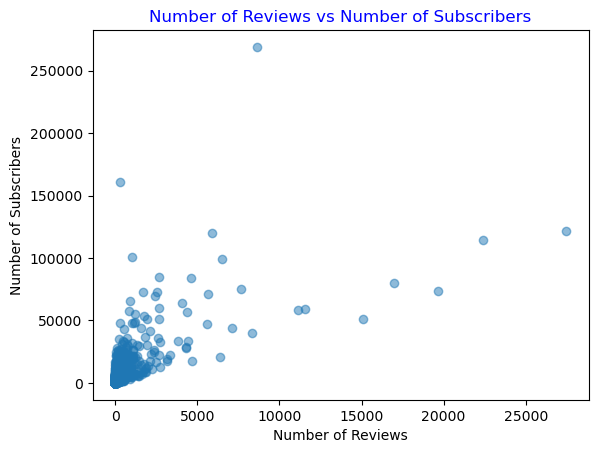

In [62]:
plt.scatter(df['num_reviews'], df['num_subscribers'], alpha=0.5)
plt.title('Number of Reviews vs Number of Subscribers',color='blue')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Subscribers')
plt.show()

**Observation:**
* There is a positive correlation between the no of subscribers and no of reviews that suggests as the no of reviews increases no of subscribers also increases.

**How do the course prices differ along different subjects?**

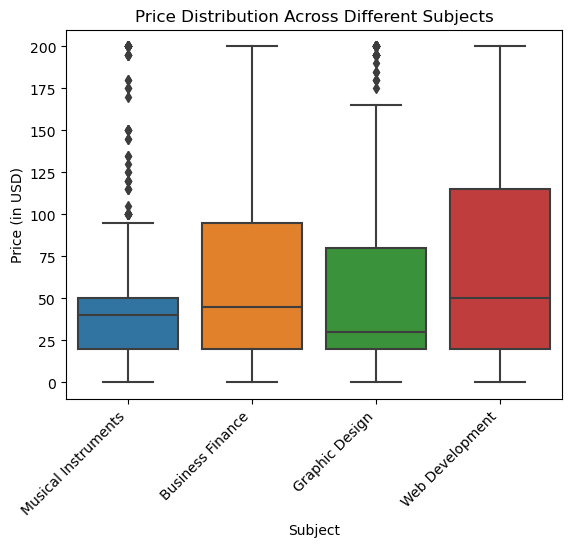

In [66]:
sns.boxplot(data=df, x='subject', y='price')
plt.title('Price Distribution Across Different Subjects')
plt.xlabel('Subject')
plt.ylabel('Price (in USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observation:**
* **Musical Instruments:** This subject has the lowest median price and a relatively small IQR.
* **Business Finance:** This subject has a higher median price and a larger IQR compared to Musical Instruments and Graphic Design.
* **Graphic Design:** This subject has a moderate median price and a smaller IQR compared to Business Finance and Web Development.
* **Web Development:** This subject has the highest median price and a larger IQR compared to Musical Instruments and Graphic Design

**What is the distribution of course prices?**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


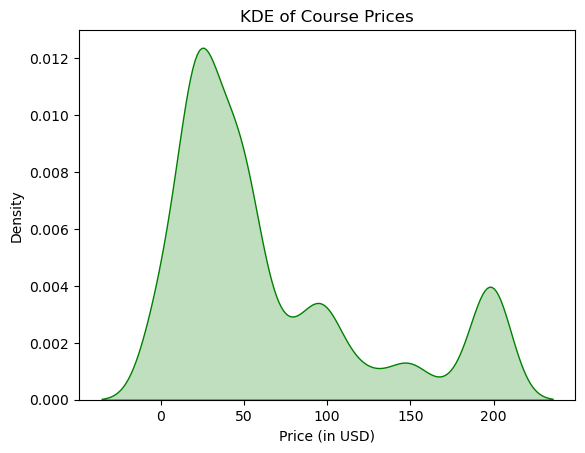

In [70]:
sns.kdeplot(df['price'], fill=True, color='green') 
plt.title('KDE of Course Prices')
plt.xlabel('Price (in USD)')
plt.ylabel('Density')
plt.show()

**Observation:**
The KDE plot revealsa non-normal distribution of course prices with multiple peaks.This suggests that there are diiferent pricing.

**How does the number of lectures vary across different levels (e.g., beginner, intermediate, expert)?**

In [74]:
a= df.groupby('level')['num_lectures'].mean().reset_index()
print(a)

                level  num_lectures
0          All Levels     45.959025
1      Beginner Level     32.996060
2        Expert Level     30.775862
3  Intermediate Level     35.935867


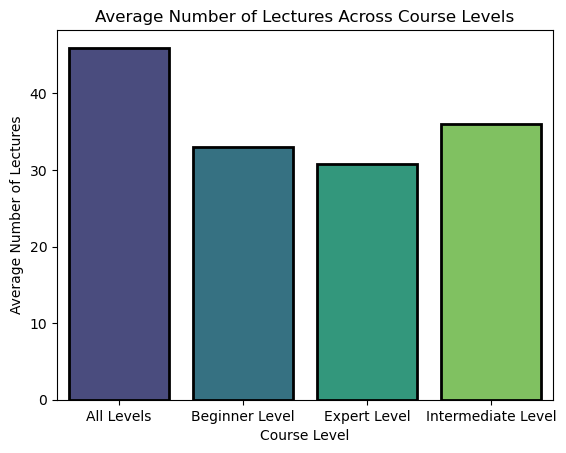

In [76]:
sns.barplot(x='level', y='num_lectures', data=a, palette='viridis',linewidth=2,edgecolor='black')
plt.title('Average Number of Lectures Across Course Levels')
plt.xlabel('Course Level')
plt.ylabel('Average Number of Lectures')
plt.show()

**Observation:**
* The Bar Plot shows that the average number of lectures is different for each course level.
* More lectures on average are found in All levels and Intermediate level courses, while Beginner and Expert Level have fewer lectures.

**What percentage of courses are free vs. paid?**

In [90]:
free= df[df['is_paid']==True].shape[0]
paid= df[df['is_paid']==False].shape[0]
total=len(df)
free= (free/ total) * 100
paid= (paid / total) * 100
print("Total number of courses",total)
print("Percentage of Free Courses",free)
print("Percentage of Paid Courses",paid)

Total number of courses 3676
Percentage of Free Courses 91.56692056583242
Percentage of Paid Courses 8.433079434167572


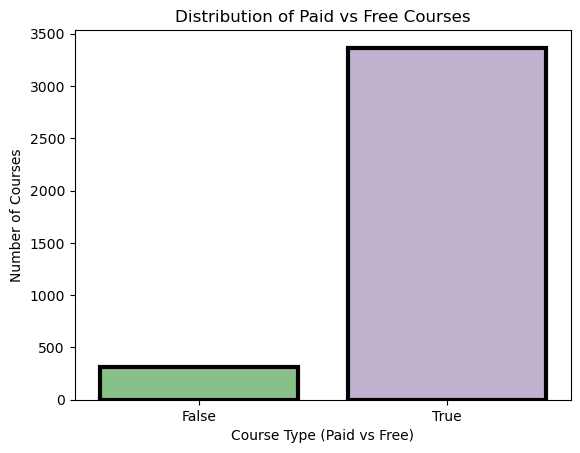

In [92]:
sns.countplot(x='is_paid', data=df, palette='Accent',linewidth=3,edgecolor='black')
plt.title('Distribution of Paid vs Free Courses')
plt.xlabel('Course Type (Paid vs Free)')
plt.ylabel('Number of Courses')
plt.show()

**Are there any trends in pricing (e.g., are paid courses generally more popular or more reviewed)?**

In [95]:
paid= df[df['price'] > 0]
free= df[df['price'] == 0]
a= paid['num_subscribers'].mean()
b= free['num_subscribers'].mean()
print("Average number of subscribers for paid courses:",a)
print("Average number of subscribers for free courses:",b)

Average number of subscribers for paid courses: 2418.997623291741
Average number of subscribers for free courses: 11533.951612903225


**Observation:**
* **Free courses** have significantly more subscribers on average than paid courses. This is likely due to the fact that free courses are more accessible and can attract a larger number of users who are interested in basic learning .
* **Paid courses** while having fewer subscribers on average, often offer more specialized, advanced, and comprehensive content.

**Are there more beginner-level courses than expert-level courses?**

In [105]:
a = df['level'].value_counts()
b= a.get('Beginner Level')
e= a.get('Expert Level')
print("Number of beginner-level courses:",b)
print("Number of expert-level courses:",e)


Number of beginner-level courses: 1269
Number of expert-level courses: 58


**Observation:**
This dataset contains far more beginner-level courses than expert-level courses. That is a very general trend across most online learning platforms.

**When were the most courses published?**

In [200]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], errors='coerce')
df['year_published'] = df['published_timestamp'].dt.year
a= df['year_published'].value_counts().sort_index()
print(a)

year_published
2011       5
2012      45
2013     201
2014     490
2015    1014
2016    1204
2017     717
Name: count, dtype: int64


**Is there a correlation between the course publishing date and the course price?**

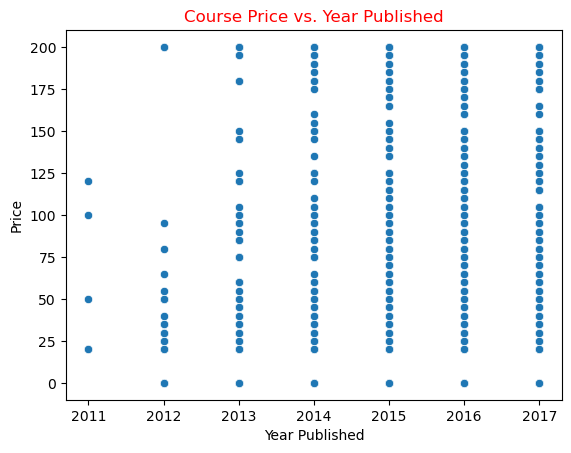

In [234]:
sns.scatterplot(x='year_published', y='price', data=df)
plt.title('Course Price vs. Year Published',color='red')
plt.xlabel('Year Published')
plt.ylabel('Price')
plt.show()

In [236]:
a= df['year_published'].corr(df['price'])
print("Correlation between course publishing year and course price:",a)

Correlation between course publishing year and course price: 0.132649718184972


**Which year saw the highest number of course publications?**

In [239]:
a= df['year_published'].value_counts().sort_index()
b= a.idxmax()
c =a.max()
print("The year with the highest number of course publications is",b,"with",c,"courses.")

The year with the highest number of course publications is 2016 with 1204 courses.


**Which subject has the highest average price for courses?**

In [154]:
a = df.groupby('subject')['price'].mean()
b= a.idxmax()
c= a.max()
print("The subject with the highest average price is:",b)
print("The average price for courses in this subject is",c)

The subject with the highest average price is: Web Development
The average price for courses in this subject is 77.03502919099249


**What is the most popular subject in terms of the number of courses?**

In [157]:
a= df['subject'].value_counts()
b= a.idxmax()
c= a.max()
print("The most popular subject is",b,"with",c,"courses.")


The most popular subject is Web Development with 1199 courses.


**What is the most common subject for free courses?**

In [160]:
a= df[df['price'] == 0]
b= a['subject'].value_counts()
c = b.idxmax()
d= b.max()
print("The most common subject for free courses is:",c,"with",d,"free courses.")


The most common subject for free courses is: Web Development with 133 free courses.


**Are there any trends in the types of subjects that are more likely to be offered for free?**

In [163]:
a= df[df['price'] == 0]
b= df[df['price'] > 0]
free = a['subject'].value_counts()
paid =b['subject'].value_counts()
s= pd.DataFrame({'Free Courses': free,'Paid Courses': paid}).fillna(0)
s['Free to Paid Ratio'] = s['Free Courses'] / s['Paid Courses']
s.sort_values('Free to Paid Ratio', ascending=False)

,Free Courses,Paid Courses,Free to Paid Ratio
subject,,,
Web Development,133,1066,0.124765
Business Finance,96,1099,0.087352
Musical Instruments,46,634,0.072555
Graphic Design,35,567,0.061728


**Which course has the highest rating, and how many reviews does it have?**

In [166]:
a = df.sort_values(by='num_reviews', ascending=False).iloc[0]
b= a['course_title']
c= a['num_reviews']
print("The course with the most reviews is:",b)
print("Number of reviews:",c)


The course with the most reviews is: The Web Developer Bootcamp
Number of reviews: 27445


**How does the average number of reviews differ between free and paid courses?**

In [169]:
free= df[df['price'] == 0.0]
paid= df[df['price'] > 0.0]
a= free['num_reviews'].mean()
b= paid['num_reviews'].mean()
print("Average number of reviews for free courses:",a)
print("Average number of reviews for paid courses:",b)


Average number of reviews for free courses: 425.9290322580645
Average number of reviews for paid courses: 131.36423054070113


**Observation:**
* Free courses are more prone to having much more average ratings than others, probably because there is wider availability for more students, hence a wider population that yields a higher rate of reviews.
* Paid courses were less reviewed in general, probably due to a smaller number of more targeted audience, or possibly since people were less likely to leave a review after paying for a course.

**What is the average number of lectures for courses in each subject?**

In [173]:
avg = df.groupby('subject')['num_lectures'].mean()
print(avg)

subject
Business Finance       32.353975
Graphic Design         32.093023
Musical Instruments    38.316176
Web Development        52.841535
Name: num_lectures, dtype: float64


**Observation:**
* Web Development courses also reflect the highest average number of lectures, implying perhaps that they consist of more inclusive or in-depth information than other courses.
* Musical Instruments, despite having a decent number of lectures, outrank Business Finance and Graphic Design in terms of average lectures.
* Business Finance and Graphic Design have similar average lectures, suggesting that these subjects are perhaps more compact or focused in terms of lecture content.

**What are the top 10 most reviewed courses, and do they have a common theme (e.g., subject, level, price)?**

In [177]:
a= df.sort_values(by='num_reviews', ascending=False).head(10)
b= a[['course_title', 'subject', 'level', 'price', 'num_reviews']]
print(b)
c= a['subject'].value_counts()
d= a['level'].value_counts()
e=a['price'].describe()
print("Subject distribution among top 10 most reviewed courses:",c)
print("Level distribution among top 10 most reviewed courses:",d)
print("\nPrice range of top 10 most reviewed courses:",e)

                                           course_title              subject  \
3385                         The Web Developer Bootcamp      Web Development   
3316              The Complete Web Developer Course 2.0      Web Development   
285   Angular 4 (formerly Angular 2) - The Complete ...      Web Development   
2034          JavaScript: Understanding the Weird Parts      Web Development   
2610                            Modern React with Redux      Web Development   
2118                     Learn and Understand AngularJS      Web Development   
2119                        Learn and Understand NodeJS      Web Development   
2230               Learn HTML5 Programming From Scratch      Web Development   
281   Angular 2 with TypeScript for Beginners: The P...      Web Development   
2829  Pianoforall - Incredible New Way To Learn Pian...  Musical Instruments   

           level  price  num_reviews  
3385  All Levels  200.0        27445  
3316  All Levels  200.0        22412  
28

**What is the relationship between the course level and the average course duration?**

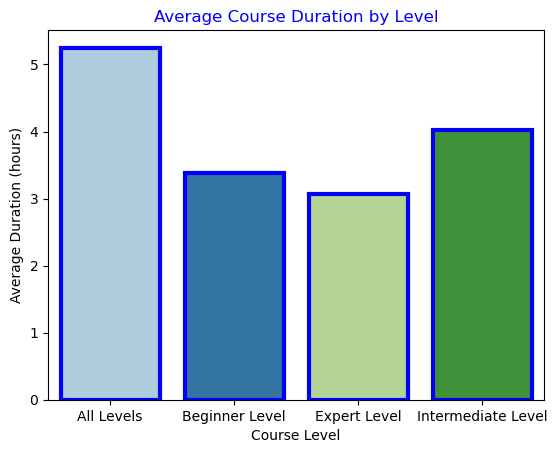

level
All Levels            5.250141
Beginner Level        3.375768
Expert Level          3.074074
Intermediate Level    4.025974
Name: duration_hours, dtype: float64


In [180]:
def convert_to_hours(duration):
    try:
        if 'hour' in duration:
            return float(duration.split()[0])
        elif 'minute' in duration:
            minutes = float(duration.split()[0])
            return minutes / 60
    except:
        return None  
df['duration_hours'] = df['content_duration'].apply(convert_to_hours)
a= df.groupby('level')['duration_hours'].mean()
sns.barplot(x=a.index, y=a.values,palette='Paired',linewidth=3,edgecolor='blue')
plt.title('Average Course Duration by Level',color='blue')
plt.xlabel('Course Level')
plt.ylabel('Average Duration (hours)')
plt.show()
print(a)

Observation:
* All Levels: On average, 5.25 hours is spent on courses by students at all levels. All course levels would have been averaged here and probably involved courses at a novice, intermediate, and advanced level.
* Intermediate Level: 3.38 hours is the average duration for an intermediate level course. So, intermediate level courses are found to be slightly short.
* Expert Level: The average course duration for expert-level courses is 3.07 hours. Expert-level courses are even shorter than beginner-level courses, on average.
* Intermediate: The intermediate course is supposed to last about 4.03 hours; hence, intermediate-level courses last for slightly longer times compared to the expert but are short for the beginners.

**Is there a relationship between course level (Beginner, Intermediate, Expert) and course price?**

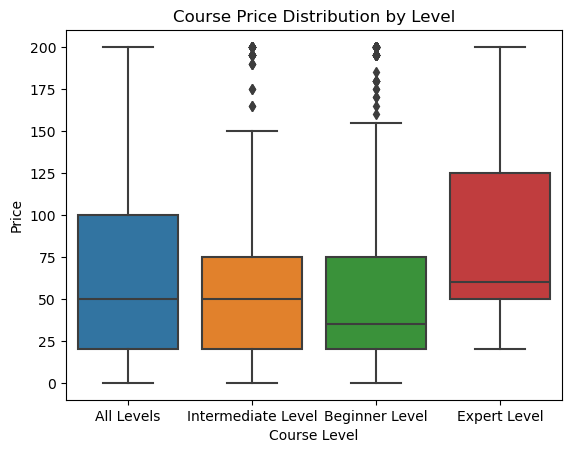

In [184]:
sns.boxplot(x='level', y='price', data=df)
plt.title('Course Price Distribution by Level')
plt.xlabel('Course Level')
plt.ylabel('Price')
plt.show()

**Observation:**
* **Expert Level** courses tend to be the most expensive,followed by **Intermediate Level** courses.**Beginner Level** courses are generally the most affordable.

**What is the distribution of course prices across all courses (paid and free)?**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


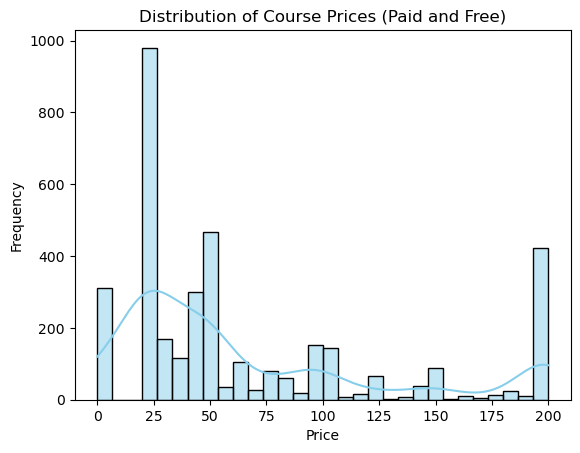

In [188]:
sns.histplot(df['price'], bins=30, kde=True, color='skyblue', fill=True)
plt.title('Distribution of Course Prices (Paid and Free)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Observation:**
* The price range of courses is from free courses to 200
* The highest frequency of price is from 0-25

**How many courses are paid vs. free?**

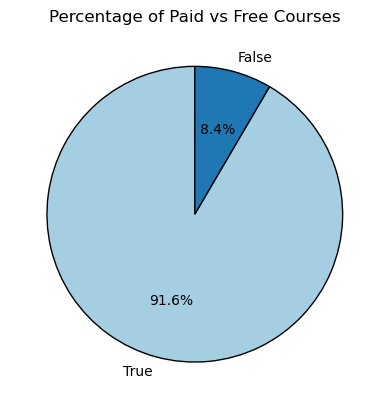

In [192]:
a= df['is_paid'].value_counts()
a.plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Paid vs Free Courses')
plt.ylabel('')  
plt.show()

**What is the distribution of courses across different subjects**

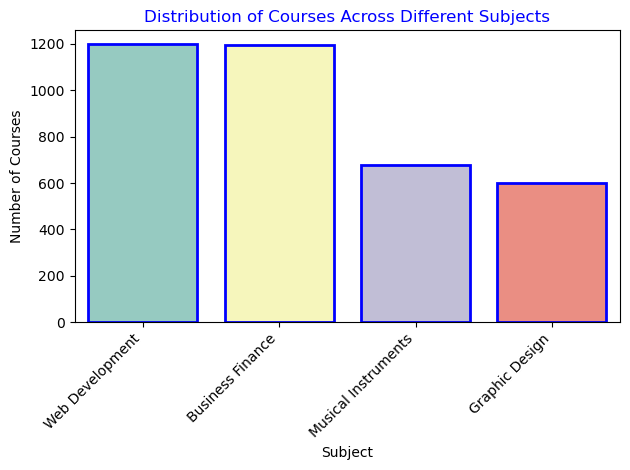

In [195]:
a= df['subject'].value_counts()
sns.barplot(x=a.index, y=a.values, palette='Set3',linewidth=2,edgecolor='blue')
plt.title('Distribution of Courses Across Different Subjects',color='blue')
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**How has the number of courses published on Udemy changed over time (year by year)?**

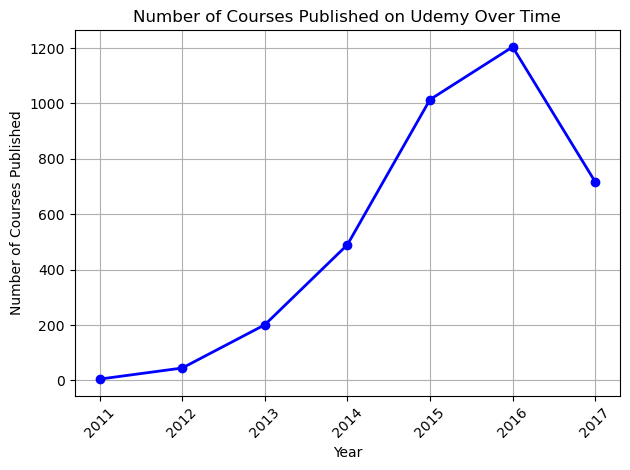

In [206]:
a= df['year_published'].value_counts().sort_index()
plt.plot(a.index, a.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Number of Courses Published on Udemy Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Courses Published')
plt.xticks(a.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:**
* The line graph clearly shows **upward trend** in the no of courses published on Udemy over the years.This indicate that the platform has experienced significant growth in popularity.

**Does the duration of a course influence its price?**

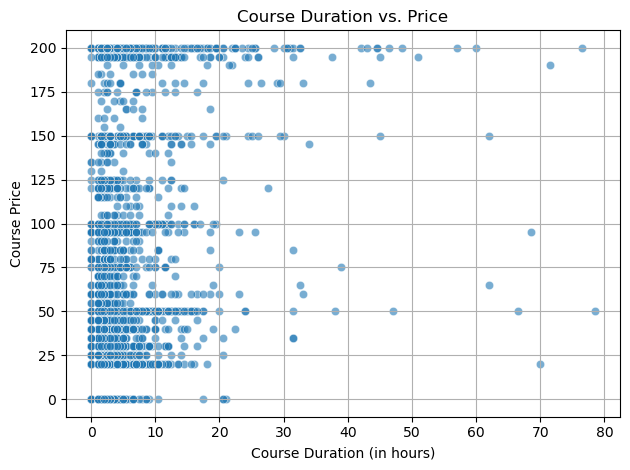

In [231]:
def extract_duration(duration_str):
    try:
        if 'hour' in duration_str:
            hours = float(duration_str.split()[0])
            return hours
        elif 'minute' in duration_str:
            minutes = float(duration_str.split()[0]) / 60  
            return minutes
        return None
    except:
        return None
df['duration'] = df['content_duration'].apply(lambda x: extract_duration(x))
df['duration'] = df['duration'].fillna(0)


sns.scatterplot(x='duration', y='price', data=df, alpha=0.6)
plt.title('Course Duration vs. Price')
plt.xlabel('Course Duration (in hours)')
plt.ylabel('Course Price')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:**
* The scatter plot shows a general positive correlation between course durationa nd price.This means that on average longer courses tend to be more expensive

**How do the numerical features correlate with each other? (e.g., price, number of reviews, number of subscribers, duration)**

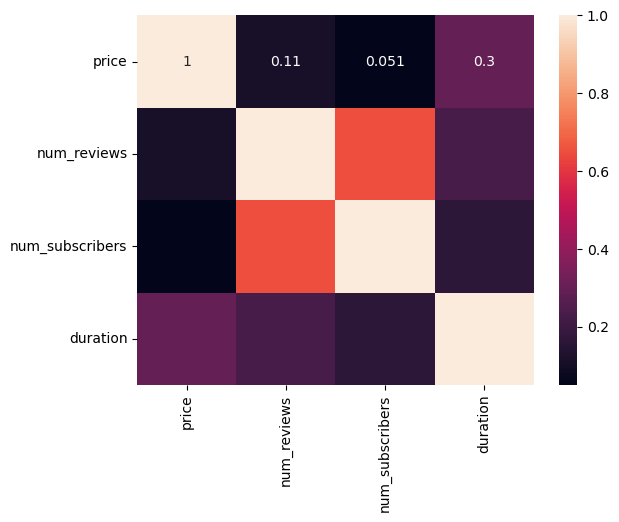

In [217]:
a = ['price', 'num_reviews', 'num_subscribers', 'duration']
b= df[a].corr()
sns.heatmap(b,annot=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

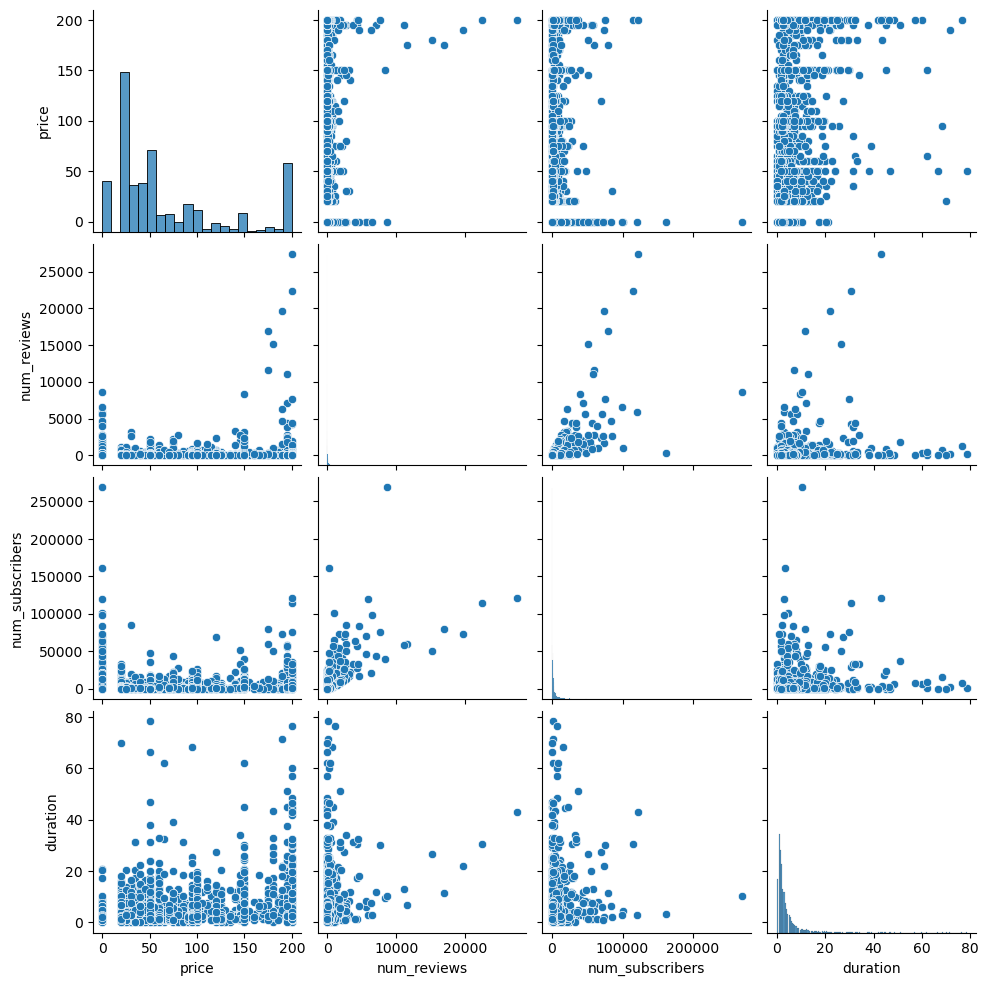

In [219]:
sns.pairplot(df[a])
plt.show()

**Observation:**
* The heatmap shows that there are generally weak correlations between the numerical features.The values in the heatmap range from -0.11 to 0.3,indicating that the relationships are not very strong.

**Conclusion of **`Udemy`** Dataset analysis**

* Course Price Trends:
paid courses vs free courses: Most courses on Udemy are paid, approximately 91.5% while free courses only account for around 8.4%.

Average Price of Paid Courses: The average price for paid courses varies widely as many courses range from 0 to 200. There are also free courses covering basic subjects.

Price vs. Subject: The average price varies with subjects; some subjects are more expensive than others, for example, Web Development and Business, which have a higher average price than other subjects like Graphic Design or Musical Instruments.

* Course Duration & Number of Lectures:
Duration: The course duration differs by level; a beginner course lasts around 3-4 hours, while courses like Web Development tend to last longer, usually up to 30-50 hours of content.

No. of Lectures: There is a direct relation between the no. of lectures and the no. of hours in a course. More the lectures, the more is the duration, particularly in subjects such as Web Development or Business.

Beginner vs. Advanced: Beginner-level courses usually contain fewer lectures and less duration as compared to the advanced-level course.

* Course Popularity & Reviews:
Number of Subscribers & Reviews: Paid courses have fewer subscribers and reviews than free courses.

Reviews and Subscriber Growth: In general, a strong linear relation does not seem to exist in the number of reviews and number of subscribers.

* Course Levels: Beginner, Intermediate, Expert.
The most popular course level is Beginner (about 35% of courses), followed by Intermediate and Expert courses, which are less frequent (under 2% of courses).

Beginner courses tend to be shorter in length and more introductory, while expert-level courses tend to be more in-depth and specialized.

* Subject Popularity and Course Numbers:

Web Development is the most popular subject by course count, followed by subjects like Business, Design, and IT & Software.

Business & Finance and Web Development courses tend to have more lectures and higher prices on average.

Some subjects like Graphic Design and Musical Instruments are more affordable and often come with shorter course durations.

* Course Publication Trends Over Time:
Yearly Growth: maximum published courses in udemy in both years 2016 and 2017.

*  Correlation Insights:
Weak to moderate correlation existed between numeric variables such as the price of a course, no. of reviews, no. of subscribers and course duration.

Price correlates positively with the length of the course and number of lectures. The longer the courses and more extensive the lectures, the more money they command.
Number of reviews correlates with number of subscribers: courses that are reviewed tend to attract more students.
